In [92]:
import pandas as pd
user_data=pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs=pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [105]:
logs


,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [106]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [10]:
logs.platform.unique()


array(['phone', 'computer', 'tablet'], dtype=object)

In [122]:
gg=logs.query('success==True').value_counts('client').reset_index()

In [123]:
gf=gg.head(9).client.tolist()

In [124]:

gf.sort()

In [75]:
gf

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [96]:
platform=logs.query('success==True').groupby('platform').agg({'success':'count'})

In [97]:
platform

,success
platform,
computer,1090
phone,2019
tablet,180


In [100]:
platform2= logs.merge(user_data,on='client',how='inner')

In [101]:
platform2

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [109]:
platform2.query('premium==True').groupby('platform').agg({'time':'count'})

,time
platform,
computer,150
phone,246
tablet,24


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


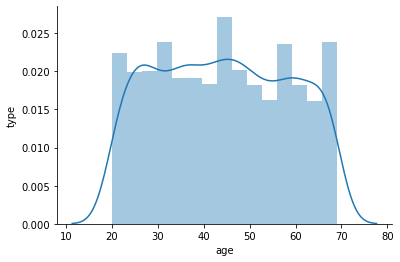

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.distplot(user_data['age'])
ax.set(xlabel='age', ylabel='type')
sns.despine()  # убрать часть рамки графика
plt.show()

In [159]:
trrue=logs.query('success==True')

In [161]:
trrue=trrue*1

In [199]:
trrue

,client,success,platform,time
0,40177,1,phone,1585412212
1,61468,1,phone,1585425658
3,9961,1,phone,1585400189
4,10931,1,computer,1585468629
5,41928,1,phone,1585446772
...,...,...,...,...
4493,92584,1,computer,1585408896
4494,95152,1,computer,1585420263
4496,73299,1,phone,1585458370
4497,8967,1,phone,1585465121


In [184]:
df=trrue.groupby('client').agg({'time':'count'},as_index=False).sort_values('time').reset_index()

In [185]:
df

,client,time
0,40,1
1,65936,1
2,66064,1
3,66245,1
4,66266,1
...,...,...
2840,28719,41
2841,52870,41
2842,36165,41
2843,92584,41


In [188]:
df2=df.groupby('time').agg({'client':'count'}).reset_index()

In [189]:
df2

,time,client
0,1,2791
1,2,43
2,3,1
3,40,1
4,41,9


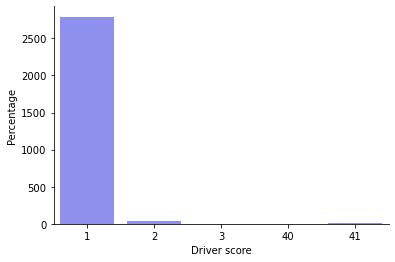

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x='time', y='client', data=df2, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [200]:
df3=trrue.merge(user_data,how='inner',on='client')

In [201]:
df3

,client,success,platform,time,premium,age
0,61468,1,phone,1585425658,False,25
1,61468,1,computer,1585460504,False,25
2,61468,1,computer,1585430291,False,25
3,61468,1,computer,1585444317,False,25
4,61468,1,phone,1585441266,False,25
...,...,...,...,...,...,...
2542,85769,1,computer,1585447052,False,46
2543,81031,1,computer,1585401631,False,45
2544,95152,1,computer,1585420263,False,67
2545,8967,1,phone,1585465121,False,33


In [213]:
df4=df3.query("platform=='computer'")groupby('age').agg({'time':'count'}).reset_index()

SyntaxError: invalid syntax (<ipython-input-213-89d30b5fd094>, line 1)

In [214]:
df4

,age,time
0,20,37
1,21,46
2,22,39
3,23,42
4,24,79
5,25,93
6,26,43
7,27,46
8,28,120
9,29,42


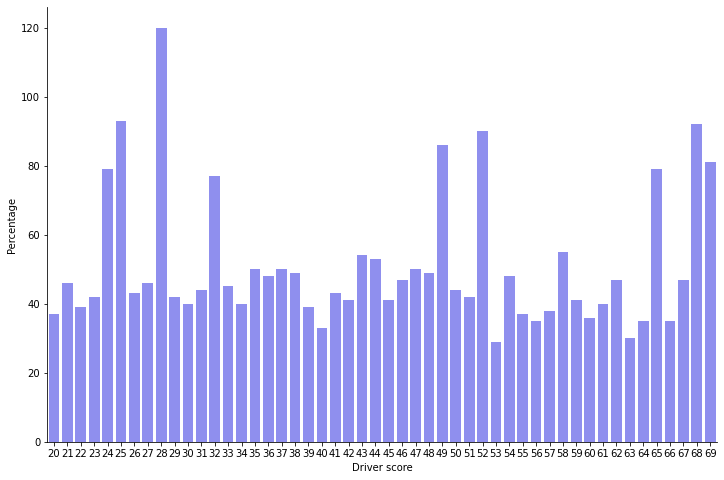

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='age' ,data=df3, color='blue', alpha=0.5)

ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [200]:
df3=trrue.merge(user_data,how='inner',on='client')

In [201]:
df3

,client,success,platform,time,premium,age
0,61468,1,phone,1585425658,False,25
1,61468,1,computer,1585460504,False,25
2,61468,1,computer,1585430291,False,25
3,61468,1,computer,1585444317,False,25
4,61468,1,phone,1585441266,False,25
...,...,...,...,...,...,...
2542,85769,1,computer,1585447052,False,46
2543,81031,1,computer,1585401631,False,45
2544,95152,1,computer,1585420263,False,67
2545,8967,1,phone,1585465121,False,33
